In [11]:
library(tidyverse)
require(gridExtra)
print(mpg)

Loading required package: gridExtra

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l~ f        18    29 p     comp~
 2 audi         a4         1.8  1999     4 manual~ f        21    29 p     comp~
 3 audi         a4         2    2008     4 manual~ f        20    31 p     comp~
 4 audi         a4         2    2008     4 auto(a~ f        21    30 p     comp~
 5 audi         a4         2.8  1999     6 auto(l~ f        16    26 p     comp~
 6 audi         a4         2.8  1999     6 manual~ f        18    26 p     comp~
 7 audi         a4         3.1  2008     6 auto(a~ f        18    27 p     comp~
 8 audi         a4 quat~   1.8  1999     4 manual~ 4        18    26 p     comp~
 9 audi         a4 quat~   1.8  1999     4 auto(l~ 4        16    25 p     comp~
10 audi         a4 quat~   2    2008     4 manual~ 4        20    28 p     comp~
# ... w

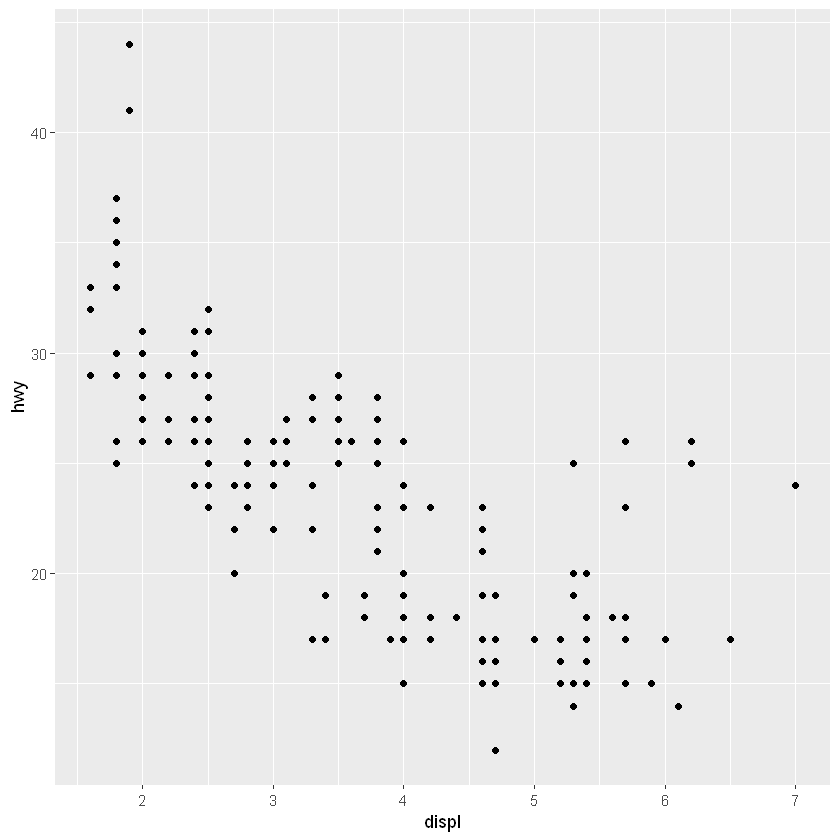

In [2]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

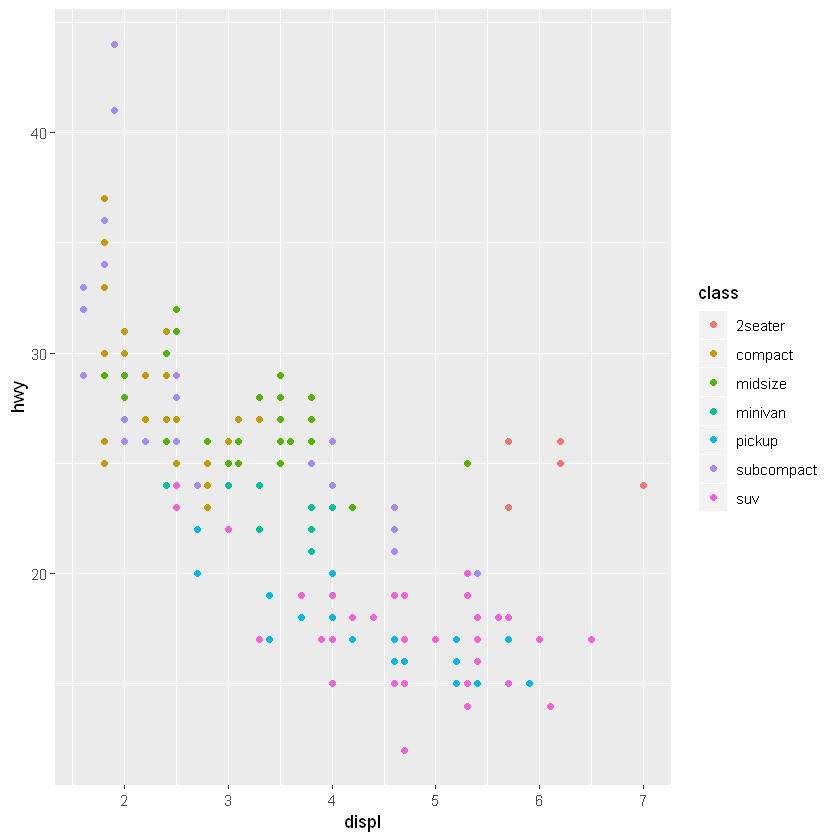

In [8]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = class))

Warning message:
"Using size for a discrete variable is not advised."

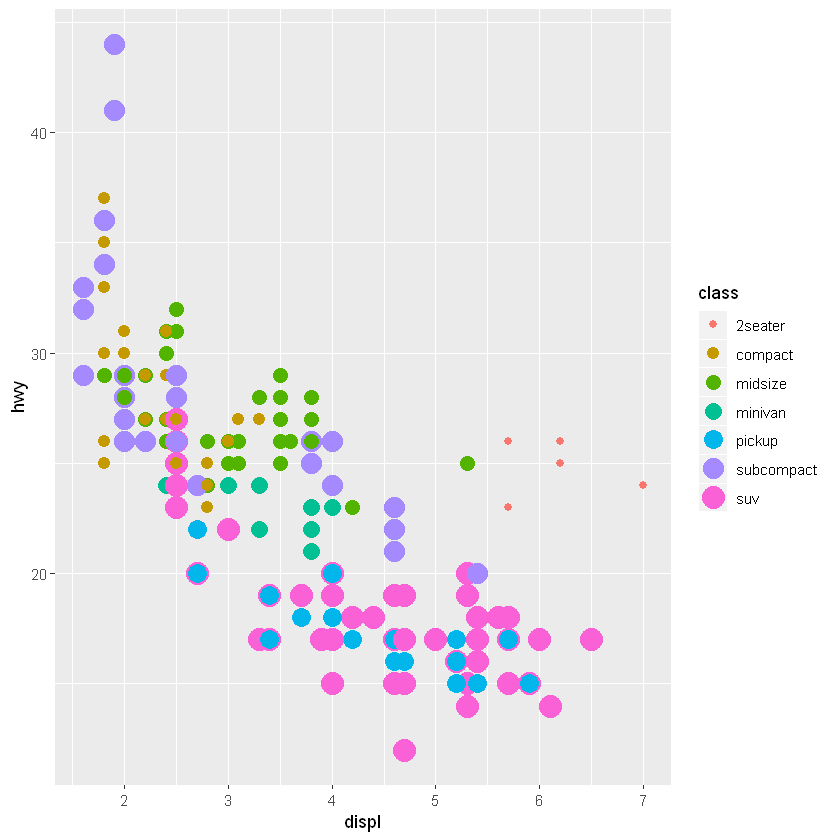

In [10]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, size = class, color = class))

Warning message:
"Using alpha for a discrete variable is not advised."Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 62 rows containing missing values (geom_point)."

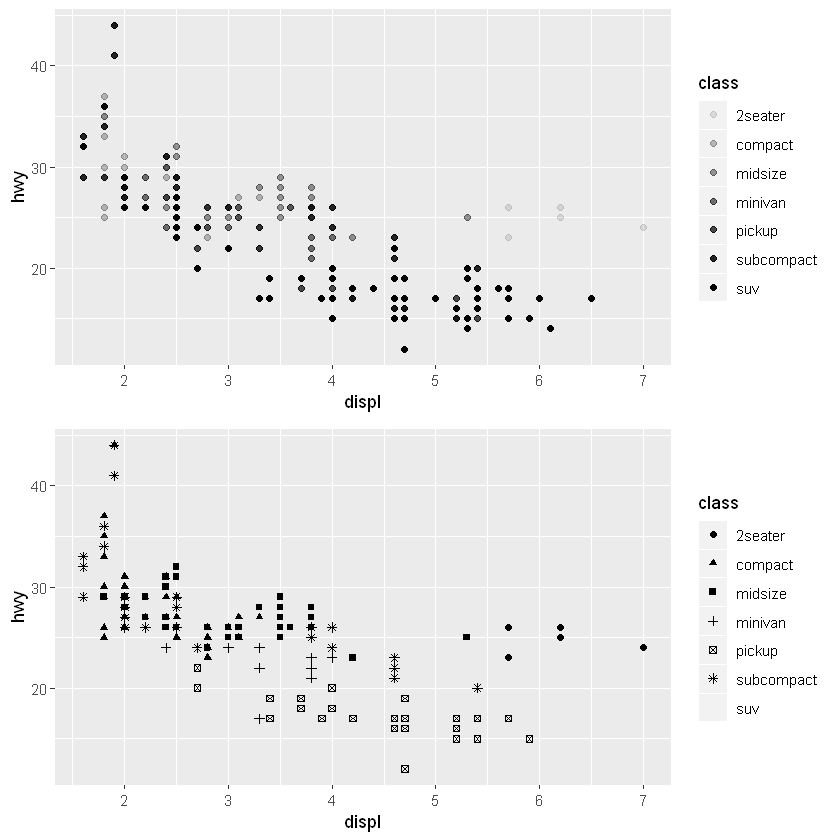

In [13]:
# left
plot1 <- ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, alpha = class))
# right
plot2 <- ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, shape = class))
grid.arrange(plot1, plot2, nrow=2)

In [15]:
summary(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

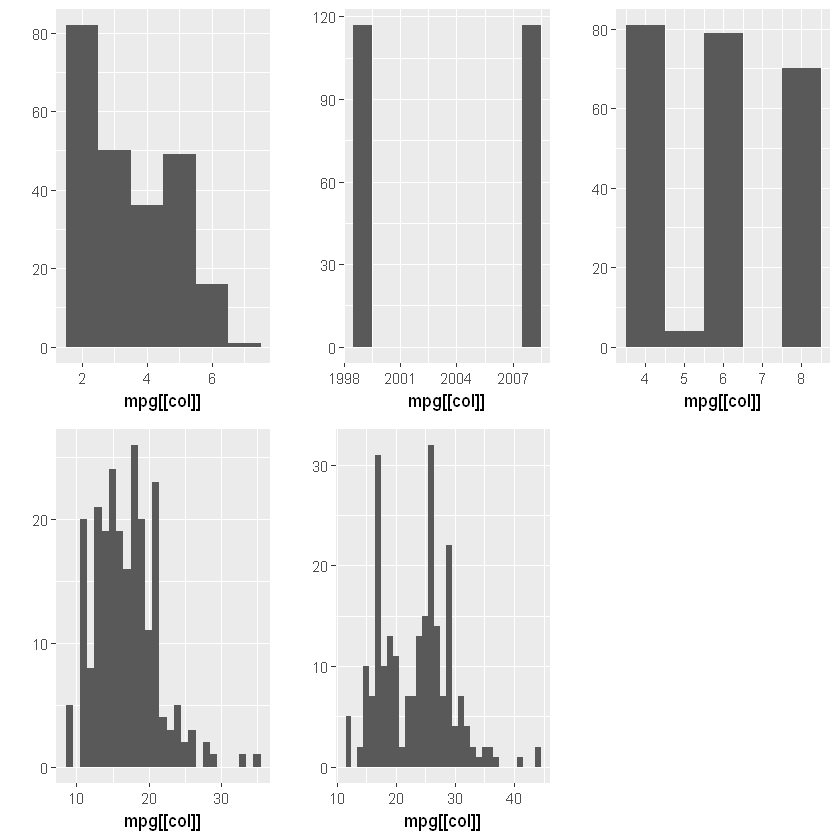

In [41]:
list <-lapply(c('displ', 'year', 'cyl', 'cty', 'hwy'),
              function(col) ggplot2::qplot(mpg[[col]], geom = "histogram", binwidth = 1))

cowplot::plot_grid(plotlist = list)

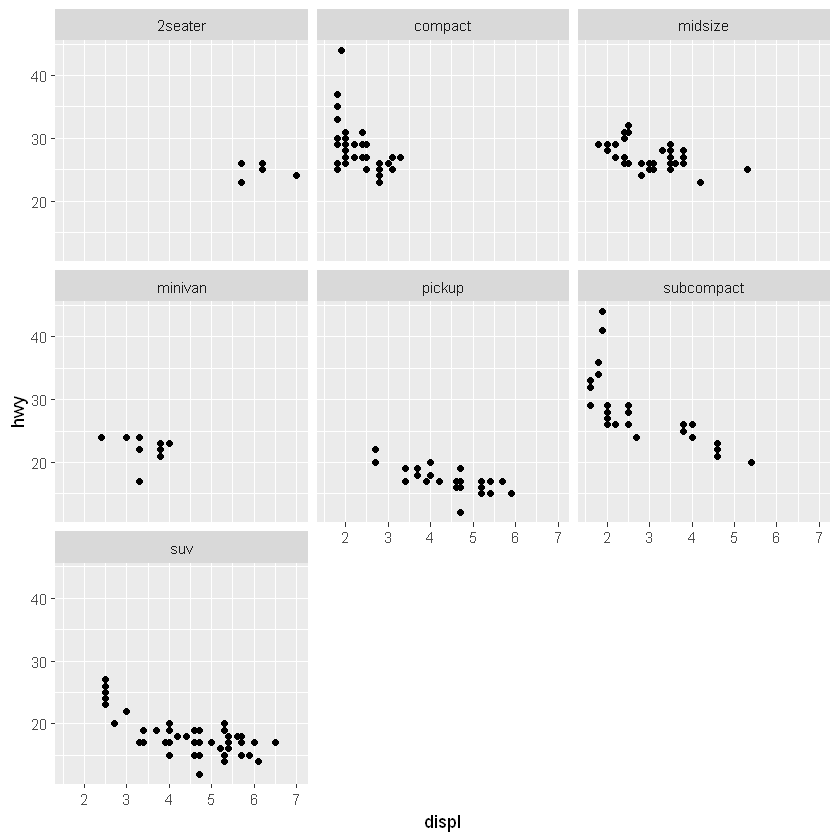

In [38]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy)) + facet_wrap(~ class, nrow = 3)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


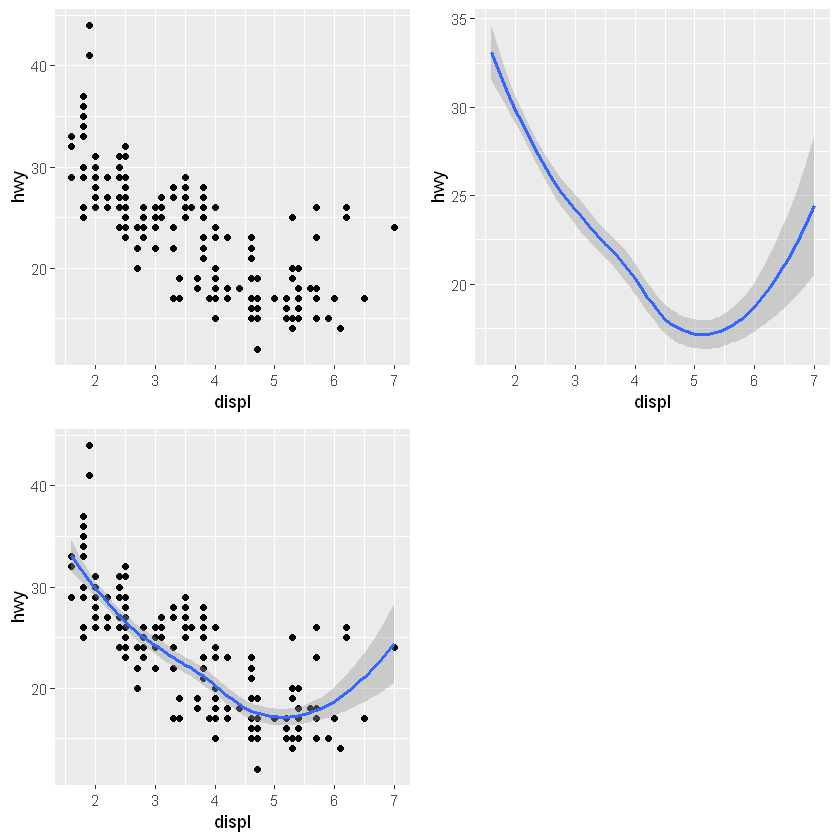

In [47]:
# left
plot1 <- ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

# right
plot2 <- ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy))
plot3 <- ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
         geom_point() + geom_smooth()
grid.arrange(plot1, plot2, plot3,nrow=2, ncol=2)

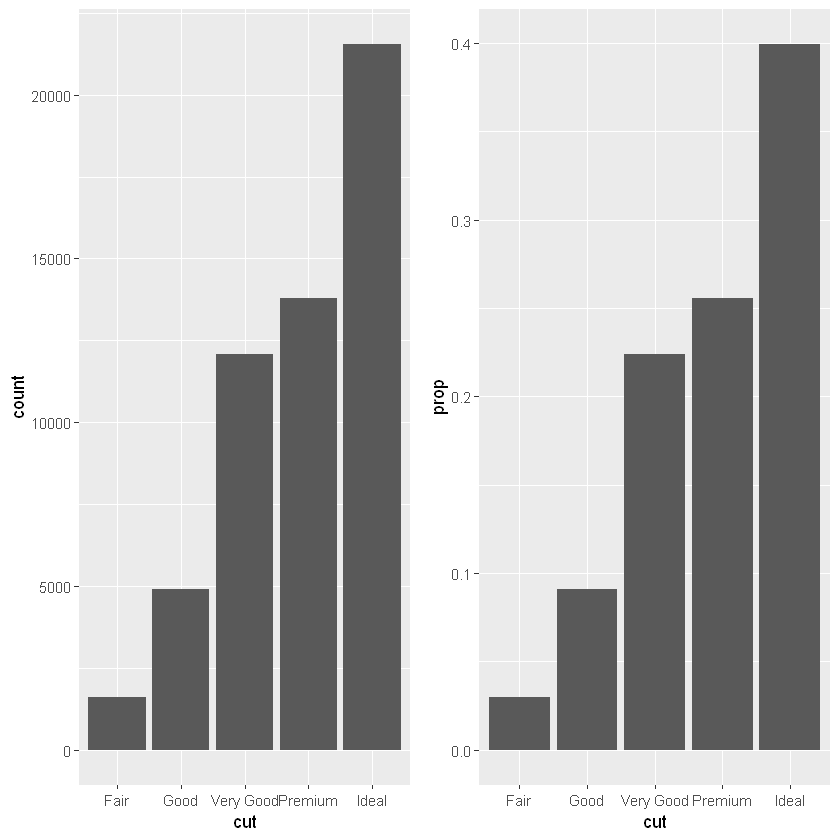

In [51]:
# the default statistical method is count
plot1 <- ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut))

# you might want to display a bar chart of proportion, rather than count:
plot2 <- ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, y = stat(prop), group = 1))

grid.arrange(plot1, plot2, ncol=2)

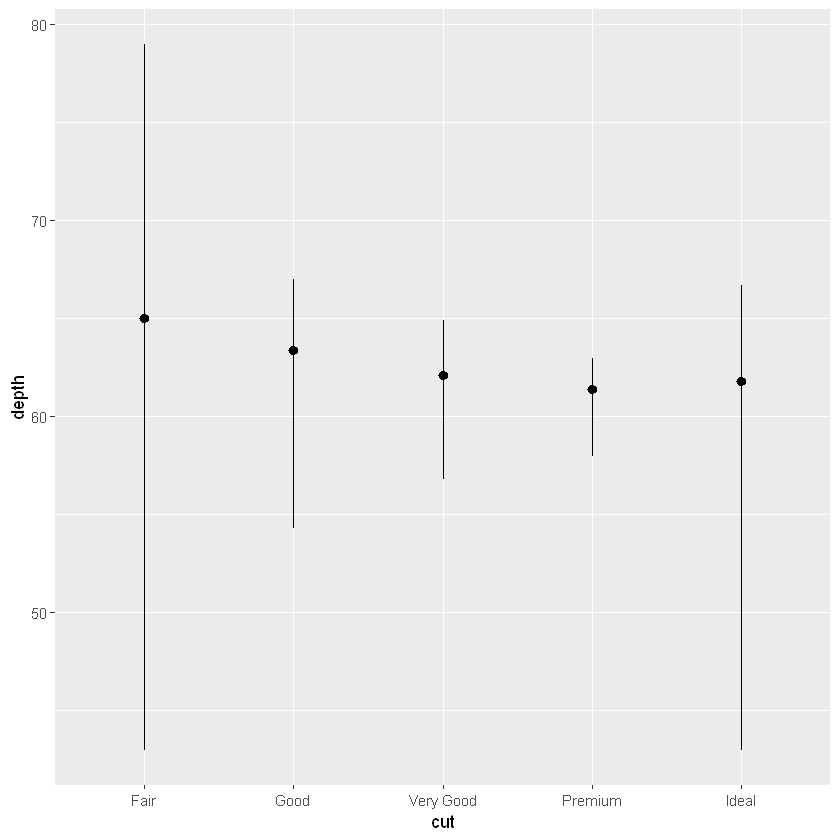

In [52]:
ggplot(data = diamonds) + stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
)

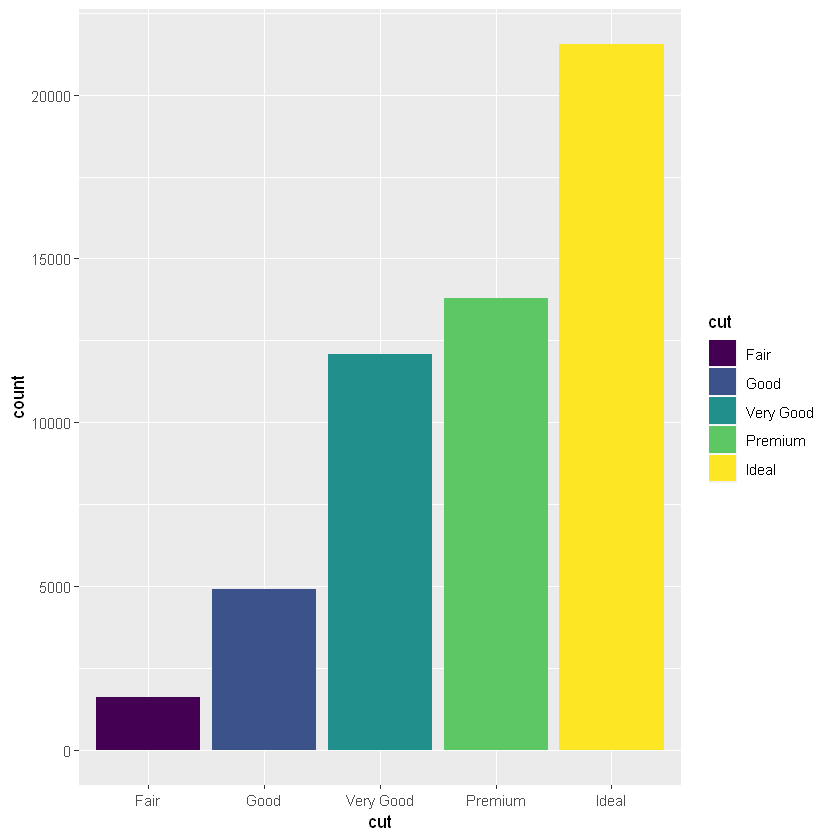

In [53]:
# There’s one more piece of magic associated with bar charts. 
# You can colour a bar chart using either the colour aesthetic, or, more usefully, fill:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut))

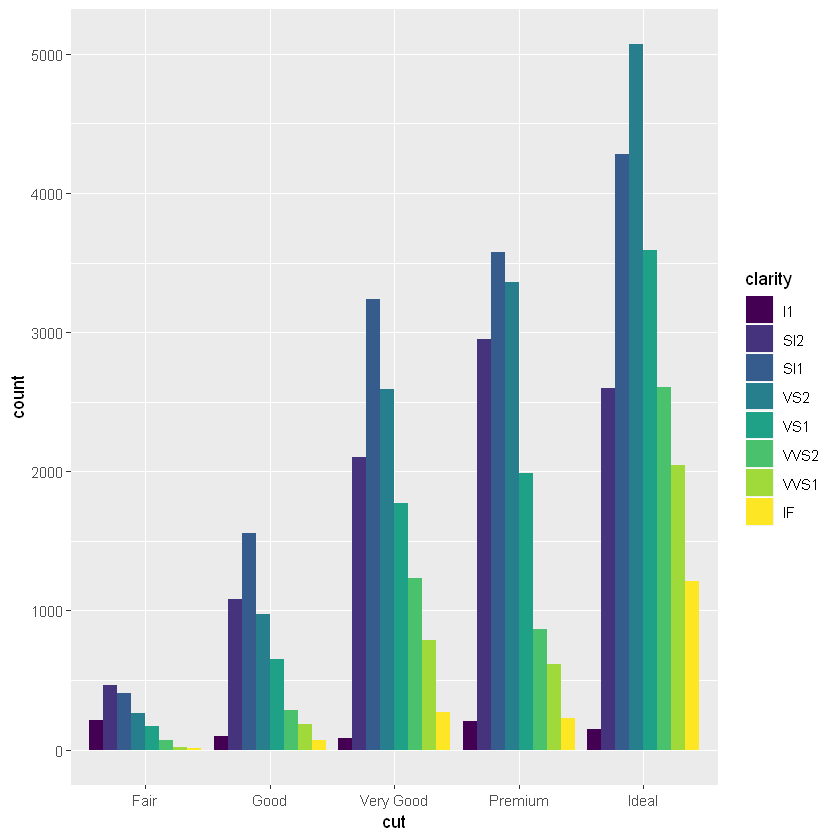

In [54]:
# position = "dodge" places overlapping objects directly beside one another. 
# This makes it easier to compare individual values
ggplot(data = diamonds) +  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")